# Grapes leaf Disease Detection

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense




In [3]:
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=15

In [5]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
r"C:\Users\Suyog\projectmay\GrapesDisease23\Grape",
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 4062 files belonging to 4 classes.


In [6]:
class_names=dataset.class_names
class_names

['Black_Measles', 'Black_rot', 'Healthy', 'Leaf_blight']

(32, 256, 256, 3)
[0 3 1 3 3 1 3 3 3 3 0 2 1 3 3 3 3 3 3 3 1 0 2 1 1 0 0 1 3 0 3 3]


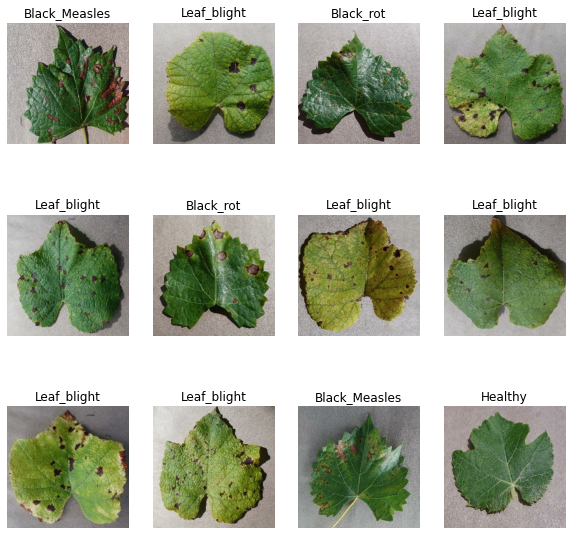

In [7]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

In [9]:


# Set image directory path and read images
image_dir = r'C:\Users\Suyog\projectmay\GrapesDisease23\Grape'

images = []
labels = []

for foldername in os.listdir(image_dir):
    folderpath = os.path.join(image_dir, foldername)

    if not os.path.isdir(folderpath):
        continue
    for filename in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath, filename))
        img = cv2.resize(img,(256,256))
        images.append(img)
        if foldername == 'Healthy':
            labels.append(0)
        elif foldername == 'Black_rot':
            labels.append(1)
        elif foldername == 'Black_Measles':
            labels.append(2)
        elif foldername == 'Leaf_blight':
            labels.append(3)

# Convert data to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [10]:
# Split dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)



(2599, 256, 256, 3)
(650, 256, 256, 3)
(2599,)
(650,)


In [11]:
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=13, batch_size=32, validation_data=(X_val, y_val))




Epoch 1/13
82/82 [==============================] - 223s 3s/step - loss: 33.9590 - accuracy: 0.4590 - val_loss: 1.0927 - val_accuracy: 0.5400
Epoch 2/13
82/82 [==============================] - 240s 3s/step - loss: 1.0509 - accuracy: 0.5494 - val_loss: 1.1360 - val_accuracy: 0.4708
Epoch 3/13
82/82 [==============================] - 220s 3s/step - loss: 0.8046 - accuracy: 0.6637 - val_loss: 0.8755 - val_accuracy: 0.6246
Epoch 4/13
82/82 [==============================] - 243s 3s/step - loss: 1.0710 - accuracy: 0.6922 - val_loss: 1.1320 - val_accuracy: 0.5231
Epoch 5/13
82/82 [==============================] - 231s 3s/step - loss: 0.6982 - accuracy: 0.7237 - val_loss: 0.6965 - val_accuracy: 0.7092
Epoch 6/13
82/82 [==============================] - 251s 3s/step - loss: 0.4303 - accuracy: 0.8295 - val_loss: 0.7939 - val_accuracy: 0.7185
Epoch 7/13
82/82 [==============================] - 253s 3s/step - loss: 0.3332 - accuracy: 0.8719 - val_loss: 0.7409 - val_accuracy: 0.7308
Epoch 8/13
8

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

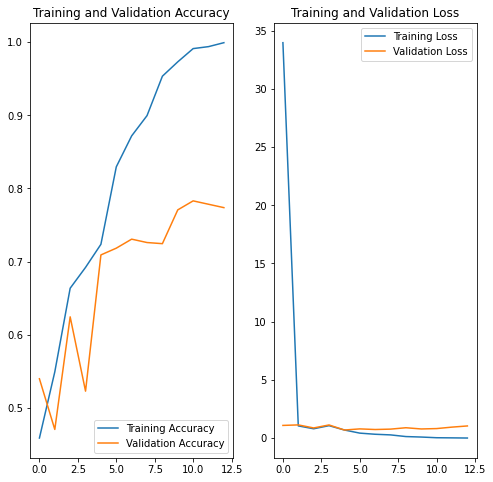

In [16]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(13),acc, label='Training Accuracy')
plt.plot(range(13), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(13), loss, label='Training Loss')
plt.plot(range(13), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)


26/26 [==============================] - 9s 337ms/step - loss: 0.9297 - accuracy: 0.8216


In [18]:
print('Test accuracy:', test_acc)

# Deploy the model
new_image = cv2.imread(r'C:\Users\Suyog\projectmay\GrapesDisease23\00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt-Copy1.N.V_HL 6067.JPG')
new_image = cv2.resize(new_image,(256,256))
new_image = np.array([new_image])
pred = model.predict(new_image)[0]
print('Predicted class:', np.argmax(pred))

Test accuracy: 0.8216482400894165
1/1 [==============================] - 2s 2s/step
Predicted class: 0


In [19]:
prediction=np.argmax(pred)
prediction

0

In [20]:
model.save('grape_model_final.h5')